#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('IMDB.csv', encoding='Latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


---
# Statistical Analysis

---

In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


# there are significant amount of null values present in our dataset

In [6]:
df.duplicated().sum()

6

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15503,14976,7239,13627,7919.000000,7920,14979,13888,13122,12363
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,408,240,2779,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# Converting features into the correct data types

In [10]:
df['Year'] = df['Year'].str.replace(r'[\(\)]', '', regex=True)  # Remove parentheses
df['Year'] = df['Year'].str.replace('-', '', regex=False)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
 # Ensure it's a string
df['Duration'] = df['Duration'].astype(str)

df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''), errors='coerce')

In [11]:
# Remove dollar sign
df['Votes'] = df['Votes'].str.replace('$', '', regex=False)
# Convert millions to full numbers
df['Votes'] = df['Votes'].str.replace('M', '000000', regex=False)
 # Convert to numeric
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [12]:
df.dtypes

,0
Name,object
Year,float64
Duration,float64
Genre,object
Rating,float64
Votes,float64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [13]:
print(df[['Year', 'Duration', 'Votes']].head())

     Year  Duration  Votes
0     NaN       NaN    NaN
1  2019.0     109.0    8.0
2  2021.0      90.0    NaN
3  2019.0     110.0   35.0
4  2010.0     105.0    NaN


---
# performing Exploratary Data Analysis

---

# Histogram for independent numeric features

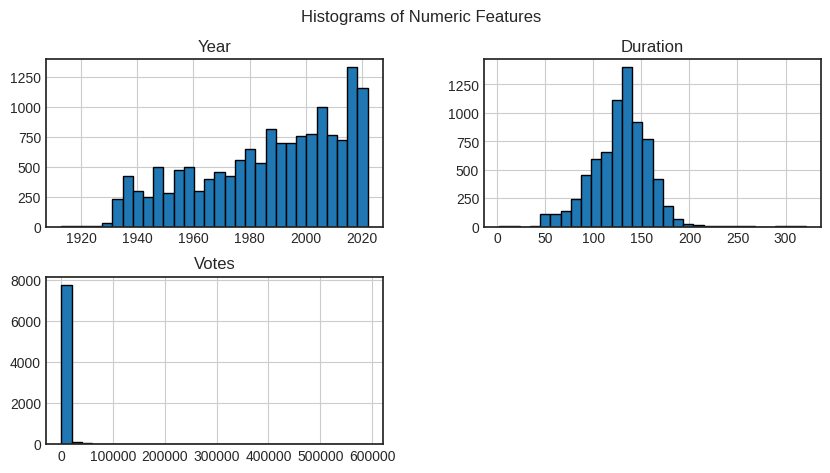

In [14]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Histogram for Dependent Variable

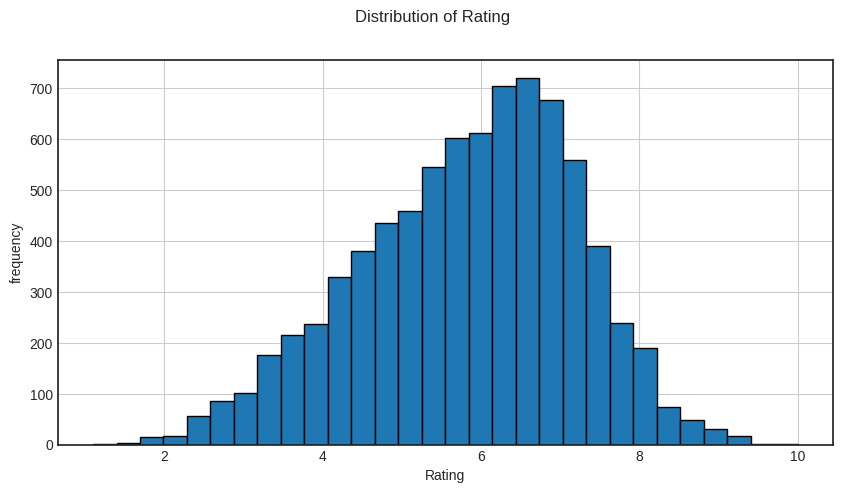

In [15]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

# Visualising Top 10 Directors with Most Movie Involvements

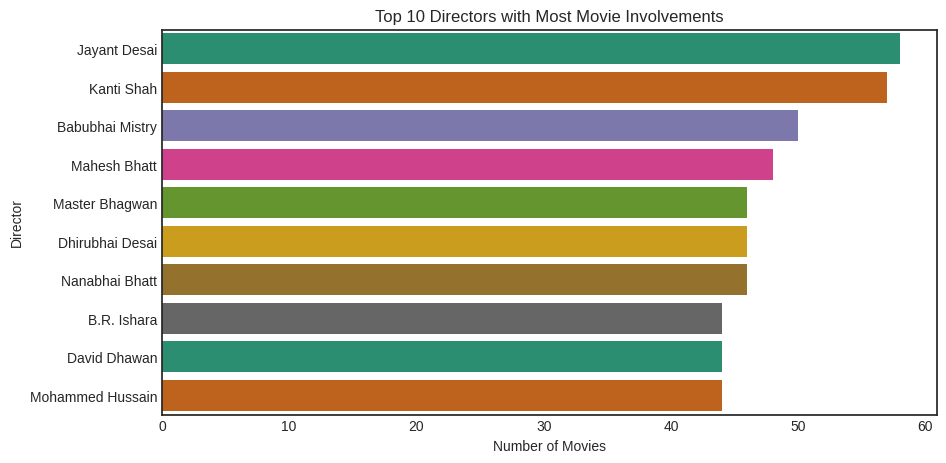

In [16]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

"Jayan Desai" is the Director with Most Movie Involvements.

# Visualising Top 10 Movie Genres

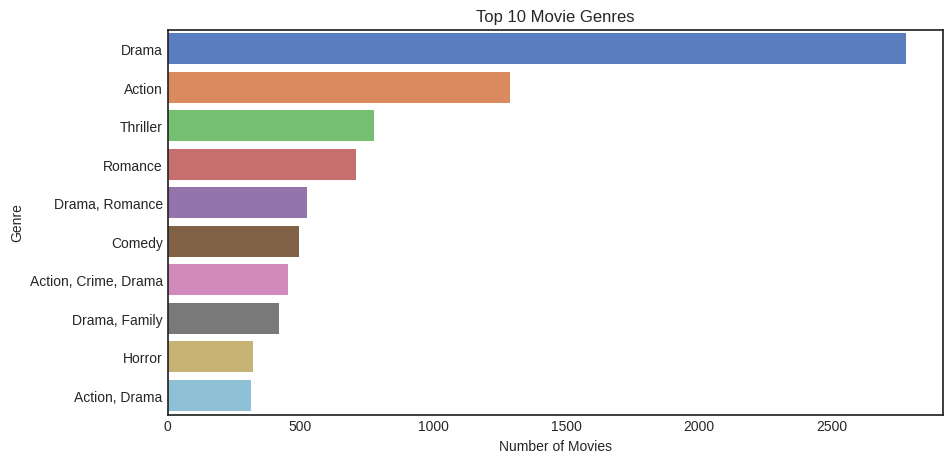

In [17]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Top 10 Actors With Most Movie Involvements


In [18]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Display the top 10 actors
top_10_actors = actors.value_counts().head(10)
top_10_actors

,count
Mithun Chakraborty,241
Dharmendra,231
Ashok Kumar,227
Jeetendra,179
Amitabh Bachchan,178
Rekha,142
Rajesh Khanna,139
Shashi Kapoor,133
Shakti Kapoor,131
Shatrughan Sinha,131


# Visulaising Top 10 Actors With Most Movie Involvements


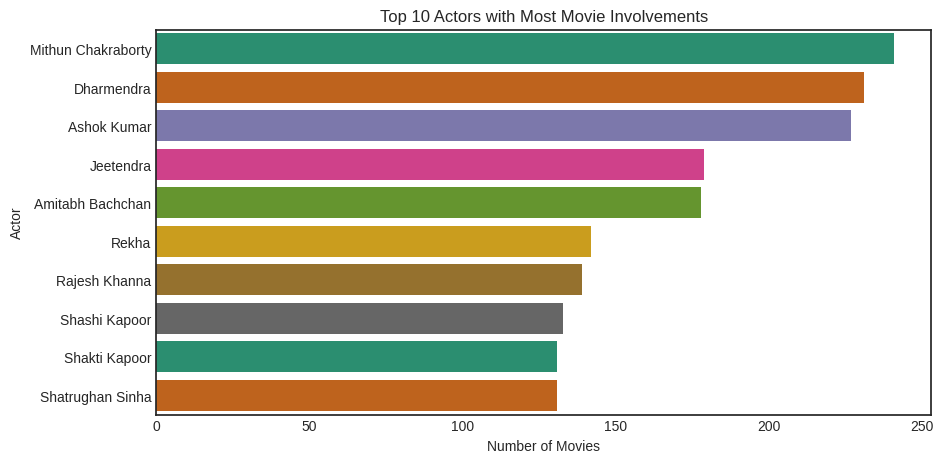

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

# "Mithun Chakraborty" has highest Movie Involvements followed by "Dharmendra".

# High rated movie details

In [20]:
high_rating_movies = df[df['Rating'] > 7]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
15,102 Not Out,2018.0,102.0,"Comedy, Drama",7.4,6619.0,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
21,12 O'Clock,1958.0,132.0,"Crime, Drama, Mystery",7.2,72.0,Pramod Chakravorty,Guru Dutt,Waheeda Rehman,Shashikala
28,13B: Fear Has a New Address,2009.0,146.0,"Drama, Horror, Mystery",7.3,6329.0,Vikram K. Kumar,Madhavan,Neetu Chandra,Poonam Dhillon
30,15 Park Avenue,2005.0,116.0,Drama,7.1,1002.0,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
...,...,...,...,...,...,...,...,...,...,...
15438,Ziddi,1948.0,NaN,Drama,7.8,37.0,Shaheed Latif,Dev Anand,Kamini Kaushal,Chanda
15449,Zinda Dil,1975.0,125.0,"Action, Romance",7.1,51.0,Sikandar Khanna,Rishi Kapoor,Neetu Singh,Zaheera
15454,Zindagani,1986.0,131.0,Drama,7.1,27.0,Prabhat Roy,Rakhee Gulzar,Mithun Chakraborty,Rati Agnihotri
15470,Zindagi Ek Safar,1988.0,120.0,"Documentary, Biography, Musical",8.2,33.0,Sandip Ray,Kishore Kumar,Amitabh Bachchan,Asha Bhosle


In [21]:
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
26,10.0,1
25,9.7,1
24,9.6,1
23,9.4,4
22,9.3,9
21,9.2,3
20,9.1,9
19,9.0,12
18,8.9,10
17,8.8,11


# Plotting Correlation Matrix

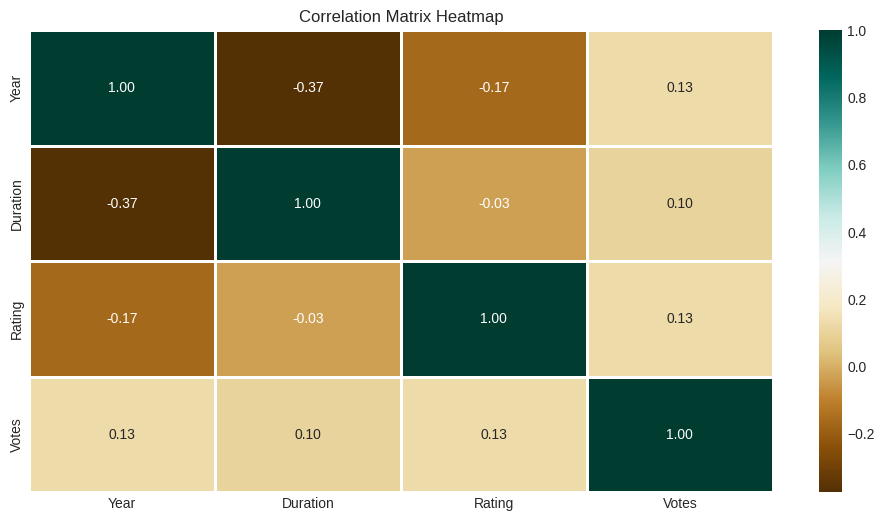

In [22]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

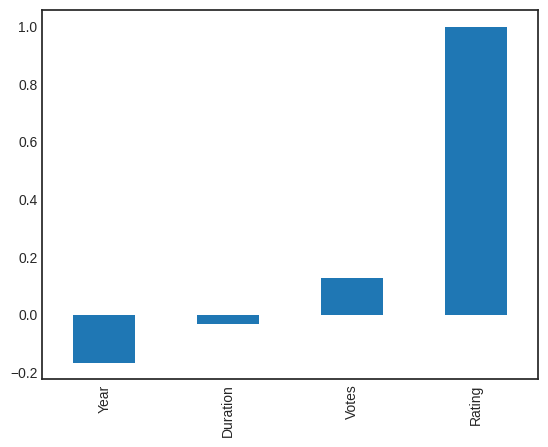

In [23]:
corr_matrix['Rating'].sort_values().plot(kind = 'bar')

# Year is negatively Correalted with the Rating

---
Feature Engineering

---


# Handling Missing Values

In [24]:
cat = list(df.columns[df.dtypes=='object'])
for i in cat:
    m = df[i].mode()[0]
    df[i].fillna(m,inplace=True)

#Dealing with the missing values in numerical features by using mean, median

In [25]:
# Fill missing values for Rating with the mean
mn = df['Rating'].mean()
df['Rating'].fillna(mn,inplace=True)
# Fill missing values for Year with the median
ym = df['Year'].median()
df['Year'].fillna(ym, inplace=True)
# Fill missing values for Duration with the mean
dm = df['Duration'].mean()
df['Duration'].fillna(dm, inplace=True)
# Fill missing values for Votes with the mean
vm = df['Votes'].mean()
df['Votes'].fillna(vm, inplace=True)

In [26]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [27]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,128.127918,Drama,5.841621,1938.276283,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.000000,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.000000,"Drama, Musical",5.841621,1938.276283,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.000000,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.000000,Drama,5.841621,1938.276283,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


High cardinality : Features having large number of unique values or large number of categories.

If we use One Hot Encoding for such features, it creates large number of binary columns, resulting in memory usage and large computation times. This is not a feasible scenario.

Hence, for this scenario, we will use Target encoding where we calcluate a group aggregation (mean) for each column and subsitute the data with mean values.

# Performing Target Encoding

In [28]:
## performing mean encoding
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Name','Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Year,Duration,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,1991.0,128.127918,5.8,6.0,5.8,5.8,5.8,5.5,5.8
1,2019.0,109.000000,7.0,6.0,5.6,7.0,6.8,7.0,7.0
2,2021.0,90.000000,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019.0,110.000000,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010.0,105.000000,5.8,6.0,5.8,6.3,6.8,5.8,5.5


# Separating independent and dependent features

In [29]:
X = df.drop(columns='Rating')
y = df[['Rating']]

In [30]:
X.head()

,Year,Duration,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,1991.0,128.127918,6.0,5.8,5.8,5.8,5.5,5.8
1,2019.0,109.000000,6.0,5.6,7.0,6.8,7.0,7.0
2,2021.0,90.000000,6.3,5.8,5.8,6.2,6.8,5.8
3,2019.0,110.000000,5.7,5.9,4.4,5.4,4.4,4.4
4,2010.0,105.000000,6.0,5.8,6.3,6.8,5.8,5.5


# Splitting the dataset into training and test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Model Training

# Importing Neccesary libraries for model

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBRegressor

# Defining models and hyperparameters for training

In [33]:
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }),
    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
    }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    })
}

# Defining Function to evaluate model performance

In [34]:
def evaluate_model(model, params, X_train, y_train, X_test, y_test, model_name):
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nPerformance Evaluation for {model_name} Model:')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'R2 Score: {r2:.4f}')

    return r2, best_model

# Evaluating multiple models to select the best one

In [35]:
best_model_name = None
best_r2_score = float('-inf')
best_model = None



# Iterate through models and evaluate
for model_name, (model, params) in models.items():
    current_r2, current_best_model = evaluate_model(model, params, X_train, y_train, X_test, y_test, model_name)

    # Update the best model if the current one is better
    if current_r2 > best_r2_score:
        best_r2_score = current_r2
        best_model_name = model_name
        best_model = current_best_model

# Final output for the best model
print(f'\nBest Model: {best_model_name} with R2 Score: {best_r2_score:.4f}')

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)


Performance Evaluation for Linear Regression Model:
Best Parameters: {}
Mean Squared Error: 0.2413
Mean Absolute Error: 0.3233
R2 Score: 0.7528

Performance Evaluation for Decision Tree Model:
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Mean Squared Error: 0.2523
Mean Absolute Error: 0.2729
R2 Score: 0.7416

Performance Evaluation for Random Forest Model:
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.1874
Mean Absolute Error: 0.2267
R2 Score: 0.8081

Performance Evaluation for Gradient Boosting Model:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean Squared Error: 0.1822
Mean Absolute Error: 0.2431
R2 Score: 0.8134

Performance Evaluation for KNN Model:
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error: 0.4190
Mean Absolute Error: 0.3853
R2 Score: 0.5708

Performance Evaluation for SVR Model:
Best Parameters: {'C': 10, 'epsilon': 0.1}
Mean Squared Err

# Plotting scatter plot of predicted vs actual values

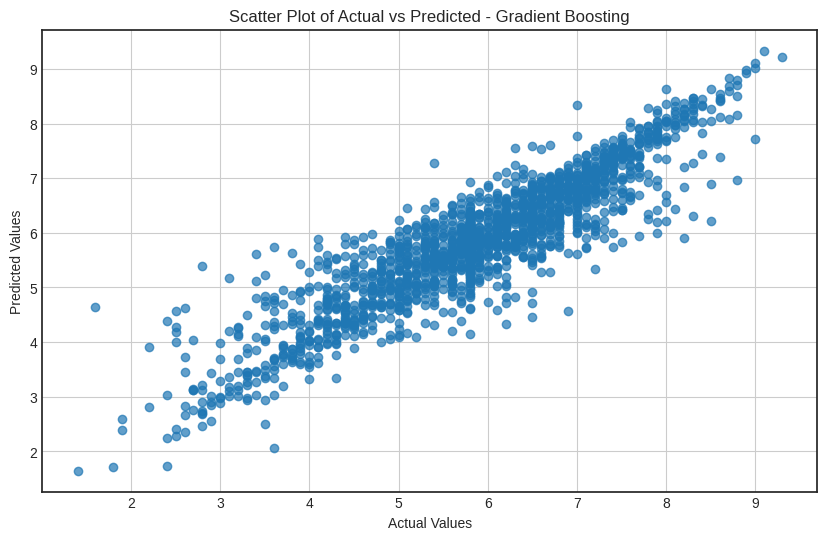

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_best_pred, alpha=0.7)
plt.title(f'Scatter Plot of Actual vs Predicted - {best_model_name}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

In [37]:
df.head(15)

,Year,Duration,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,1991.0,128.127918,5.8,6.0,5.8,5.8,5.8,5.5,5.8
1,2019.0,109.000000,7.0,6.0,5.6,7.0,6.8,7.0,7.0
2,2021.0,90.000000,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019.0,110.000000,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010.0,105.000000,5.8,6.0,5.8,6.3,6.8,5.8,5.5
5,1997.0,147.000000,4.7,6.2,4.8,5.4,4.8,5.8,5.8
6,2005.0,142.000000,7.4,6.8,7.4,7.5,5.4,6.0,6.3
7,2008.0,59.000000,5.8,6.4,5.8,5.8,5.9,5.9,5.9
8,2012.0,82.000000,5.6,5.6,6.6,5.6,5.6,5.9,5.6
9,2014.0,116.000000,4.0,5.4,5.4,4.0,4.0,4.6,4.0


---
# Model Testing
---

In [38]:
# Create new trial dataframe for testing with specific feature names
data = {
    'Year': [2014.0, 2018],
    'Duration': [116.0, 130],
    'Genre encoded': [5.4, 6.0],
    'Votes encoded': [116, 100],
    'Director encoded': [5.4, 6.5],
    'Actor 1 encoded': [4.0, 5.5],
    'Actor 2 encoded': [4.0, 5.8],
    'Actor 3 encoded': [4.6, 5.3]
}

trail_data = pd.DataFrame(data)

# Predict ratings using trial data
predict_rating = best_model.predict(trail_data)
print('Predicted Ratings for trial data: ', predict_rating)

Predicted Ratings for trial data:  [5.67957784 8.01724547]
